# 2D Laplace Equation

Laplace Equation in 2D
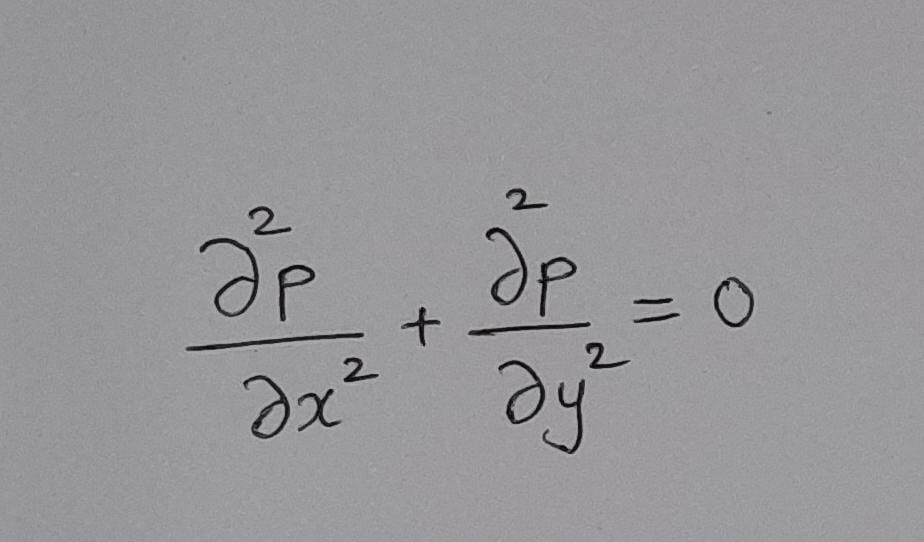

Laplace equation has the features of diffusion. So the equation has to be discretized with central differences. 


The discretized equation is,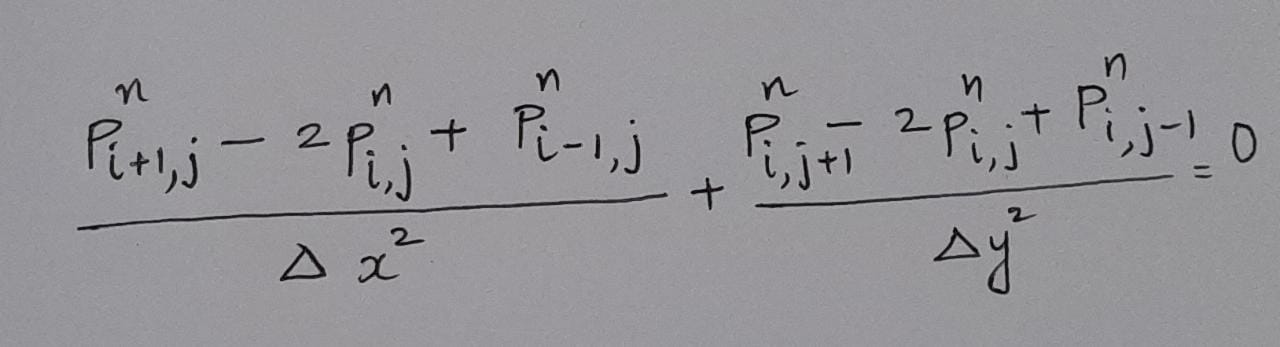

Laplace equation doesnot have time dependance. Laplace equation calculates the equillibrium state of a system under the supplied boundary conditions. Laplace equation is the steady state heat equation. Instead of calculating where the system will be at time t, equation have to be iteratively solved for (pi,j)^n until it meet the specified condition. The system will reach equillibrium only as the number of iterations tend to infinity. But we can approximate the equillibrium state by iterating the change between one iteration and the next iteration is very small. 

The discretized equation can be rearranged as,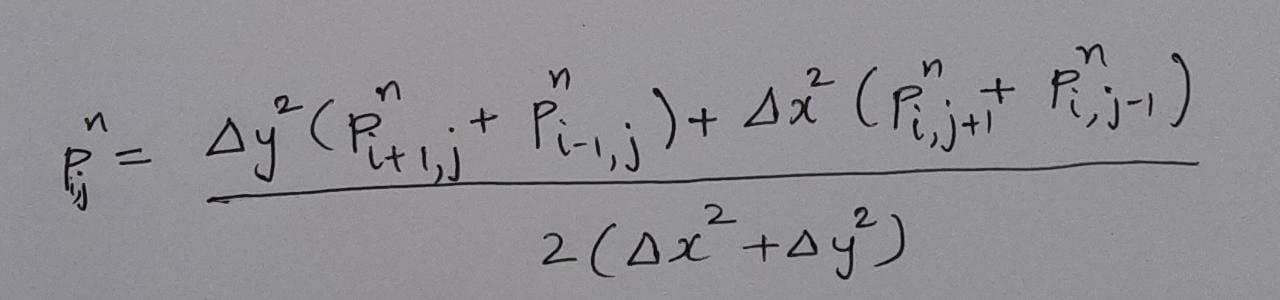

Using second order central difference schemes in both directions is used,which is also known as 'five point difference operator'

Laplace equation is solved numerically by assuming initial state p=0 everywhere. The boundary conditions are as follows:


p=0 at x=0


p=y at x=2

dp/dy=0 at y=0,1

Analytical solution for Laplace equation under these conditions:
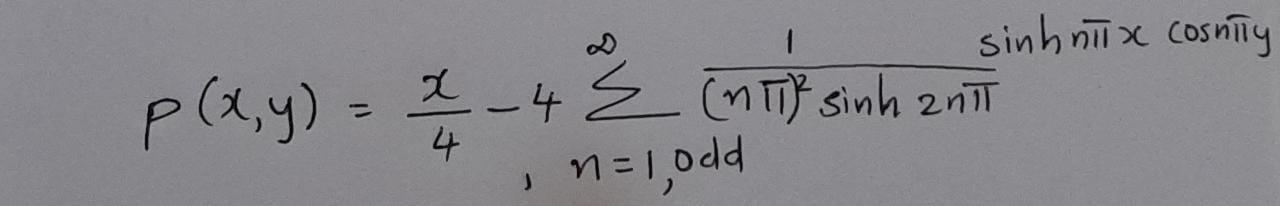

# Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot,cm
from mpl_toolkits.mplot3d import Axes3D 

In [6]:
def plot2D(x,y,p):
  fig=plt.figure(figsize=(11,7),dpi=100)
  ax=fig.gca(projection='3d')
  X,Y=np.meshgrid(x,y)
  surf=ax.plot_surface(X,Y,p[:],rstride=1,cstride=1,cmap=cm.viridis,linewidth=0,antialiased=False)
  ax.set_xlim(0,2)
  ax.set_ylim(0,2)
  ax.view_init(30,225)
  ax.set_xlabel('$X$')
  ax.set_xlabel('$Y$')



In [12]:
def laplace2d(p, y, dx, dy, l1norm_target):
    l1norm = 1
    pn = np.empty_like(p)

    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
                         dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) /
                        (2 * (dx*2 + dy*2)))
            
        p[:, 0] = 0  # p = 0 @ x = 0
        p[:, -1] = y  # p = y @ x = 2
        p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
        p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1
        l1norm = (np.sum(np.abs(p[:]) - np.abs(pn[:])) /
                np.sum(np.abs(pn[:])))
     
    return p


In [9]:
##variable declarations
nx=31
ny=31
c=1
dx=2/(nx-1)
dy=2/(ny-1)
##initial conditions
p=np.zeros((ny, nx)) # create a XxY vector of 0's
##plotting aids
x = np.linspace(0, 2, nx)
y = np.linspace(0, 1, ny)
##boundary conditions
p[:, 0] = 0  # p = 0 @ x = 0
p[:, -1] = y  # p = y @ x = 2
p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1

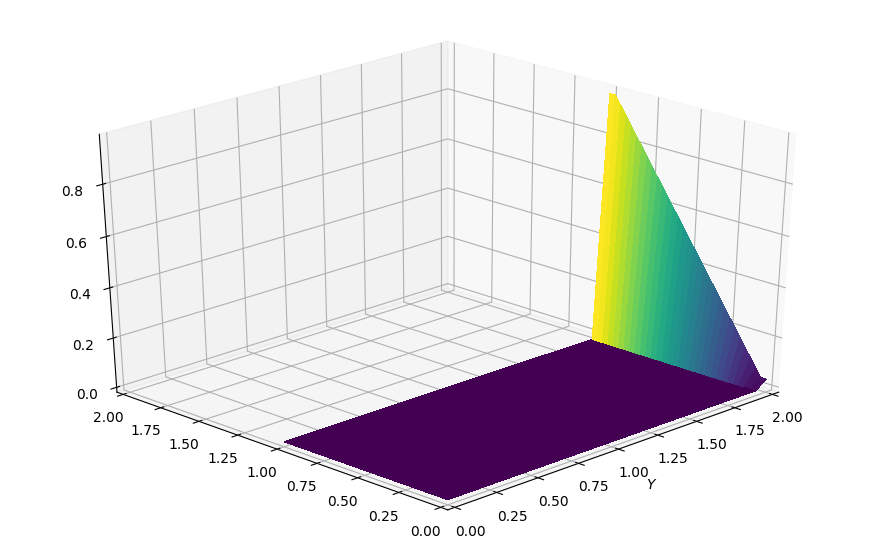

In [10]:
plot2D(x,y,p)

In [14]:
p=laplace2d(p,y,dx,dy,1e-4)

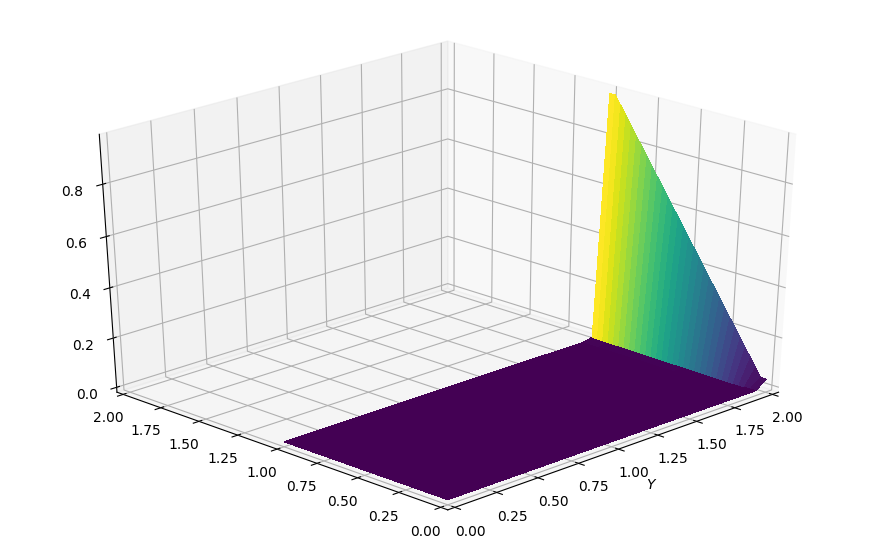

In [16]:
plot2D(x,y,p)